<a href="https://colab.research.google.com/github/arnabroy3321/Soil-Irrigation/blob/main/soil_moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("plant_vase1(2).csv")

In [ ]:
df

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2020,3,9,23,43,52,0.17,0.39,0.52,0.12,0.03,False
4405,2020,3,9,23,44,52,0.17,0.39,0.52,0.12,0.03,False
4406,2020,3,9,23,45,52,0.17,0.39,0.52,0.12,0.03,False
4407,2020,3,9,23,46,52,0.17,0.39,0.52,0.12,0.03,False


In [ ]:
df.isnull().sum()

year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64

In [ ]:
df["irrgation"].value_counts()

irrgation
False    4409
Name: count, dtype: int64

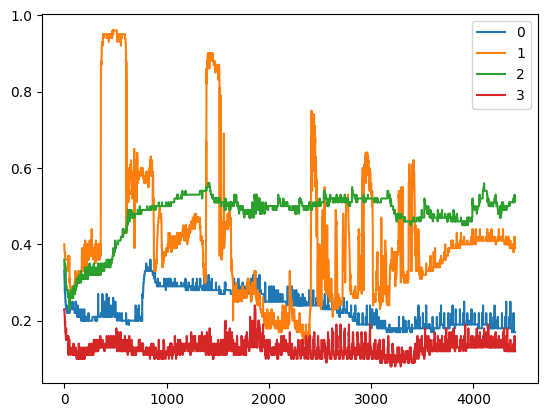

In [ ]:
plt.figure()
plt.plot(df["moisture0"])
plt.plot(df["moisture1"])
plt.plot(df["moisture2"])
plt.plot(df["moisture3"])
plt.legend(["0", "1", "2", "3"])
plt.show()

In [ ]:
# Define a threshold to create the target variable
threshold = 0.3
df['has_moisture'] = df[['moisture0', 'moisture1', 'moisture2', 'moisture3', 'moisture4']].mean(axis=1) > threshold
df

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation,has_moisture
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2020,3,9,23,43,52,0.17,0.39,0.52,0.12,0.03,False,False
4405,2020,3,9,23,44,52,0.17,0.39,0.52,0.12,0.03,False,False
4406,2020,3,9,23,45,52,0.17,0.39,0.52,0.12,0.03,False,False
4407,2020,3,9,23,46,52,0.17,0.39,0.52,0.12,0.03,False,False


In [ ]:
# Prepare features and target
X = df[['moisture0', 'moisture1', 'moisture2', 'moisture3', 'moisture4']]
y = df['has_moisture'].astype(int)  # Convert boolean to integer (0 or 1)

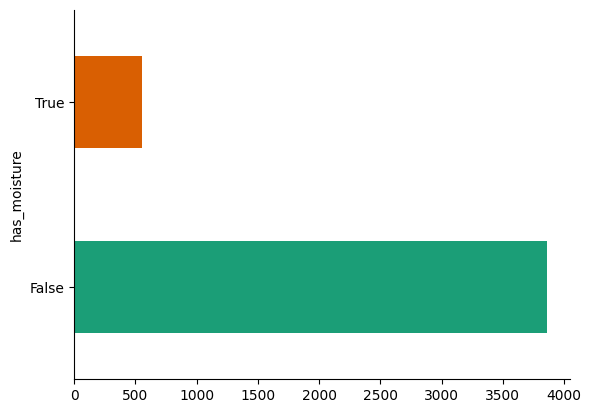

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('has_moisture').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences of data
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [ ]:
!pip install tensorflow

In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
88/88 [==============================] - 16s 92ms/step - loss: 0.2707 - accuracy: 0.9115 - val_loss: 0.1065 - val_accuracy: 0.9744
Epoch 2/20
88/88 [==============================] - 3s 37ms/step - loss: 0.0944 - accuracy: 0.9769 - val_loss: 0.1009 - val_accuracy: 0.9716
Epoch 3/20
88/88 [==============================] - 3s 38ms/step - loss: 0.0873 - accuracy: 0.9780 - val_loss: 0.0928 - val_accuracy: 0.9773
Epoch 4/20
88/88 [==============================] - 5s 53ms/step - loss: 0.0847 - accuracy: 0.9783 - val_loss: 0.1050 - val_accuracy: 0.9702
Epoch 5/20
88/88 [==============================] - 4s 46ms/step - loss: 0.0838 - accuracy: 0.9805 - val_loss: 0.0856 - val_accuracy: 0.9773
Epoch 6/20
88/88 [==============================] - 3s 39ms/step - loss: 0.0797 - accuracy: 0.9780 - val_loss: 0.0851 - val_accuracy: 0.9773
Epoch 7/20
88/88 [==============================] - 3s 36ms/step - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.0831 - val_accuracy: 0.9801
Epoch 8/20
8

In [ ]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

28/28 [==============================] - 1s 7ms/step
Accuracy: 0.9795454545454545
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       754
           1       0.90      0.97      0.93       126

    accuracy                           0.98       880
   macro avg       0.95      0.97      0.96       880
weighted avg       0.98      0.98      0.98       880



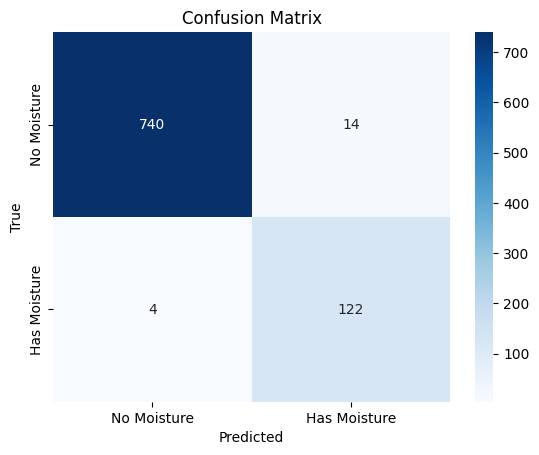

In [ ]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Moisture', 'Has Moisture'], yticklabels=['No Moisture', 'Has Moisture'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the CNN-LSTM model
model1 = Sequential()

# Add a Conv1D layer
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, X.shape[1])))
model1.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer
model1.add(LSTM(50))

# Add a Dense layer
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 2s 22ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0549 - val_accuracy: 0.9858
Epoch 2/20
88/88 [==============================] - 1s 16ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 3/20
88/88 [==============================] - 1s 15ms/step - loss: 0.0475 - accuracy: 0.9865 - val_loss: 0.0528 - val_accuracy: 0.9844
Epoch 4/20
88/88 [==============================] - 1s 15ms/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0539 - val_accuracy: 0.9844
Epoch 5/20
88/88 [==============================] - 1s 16ms/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0639 - val_accuracy: 0.9759
Epoch 6/20
88/88 [==============================] - 1s 15ms/step - loss: 0.0389 - accuracy: 0.9897 - val_loss: 0.0490 - val_accuracy: 0.9844
Epoch 7/20
88/88 [==============================] - 1s 16ms/step - loss: 0.0432 - accuracy: 0.9890 - val_loss: 0.0564 - val_accuracy: 0.9815
Epoch 8/20
88

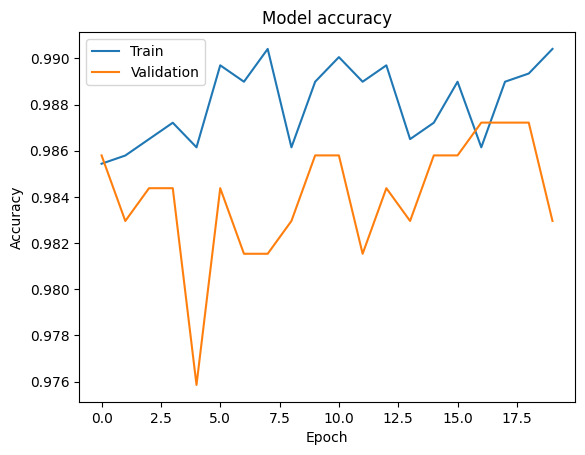

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

28/28 [==============================] - 0s 5ms/step
Accuracy: 0.9772727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       754
           1       0.90      0.94      0.92       126

    accuracy                           0.98       880
   macro avg       0.95      0.96      0.95       880
weighted avg       0.98      0.98      0.98       880

